### Importing Libraries

In [94]:
# Data Manipulation
import pandas as pd
import numpy as np
import category_encoders as ce

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.inspection import permutation_importance

# Stats
from scipy import stats
from scipy.stats import chi2_contingency

# Others
import warnings  
warnings.filterwarnings('ignore')

### Loading Data / Exploratory Data Analysis

In [116]:
# Load data 
data = pd.read_csv('data.csv')

# Drop useless column
data.drop(['Unnamed: 32'], axis=1, inplace=True)

# Affichage des 5 premieres lignes du data train
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [117]:
# Nombre de lignes et de colonnes des data
data.shape

(569, 32)

In [118]:
# Noms des attributs
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [119]:
# Types des variables
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [120]:
# Infos sur le dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [121]:
# Répartition des observations
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

- 62.74% des observations du dataset ont été diagnostiquées comme porteur du "benign cancer" (B).
- 32.26% restant comme porteur du "malignant cancer" (M).

In [136]:
# Basic statistics on numeric features 
data.drop(['diagnosis', 'id'], axis = 1, inplace = False).describe() #drop target column ('diagnosis')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Correlation between Numeric Variable

Let's find correlation between Numeric Variable

In [124]:
# New dataframe to calculate correlation between numeric features
corr_df = data.drop(['diagnosis'], axis=1, inplace=False)
#cor= corr_df.corr(method='pearson')
#print(cor)

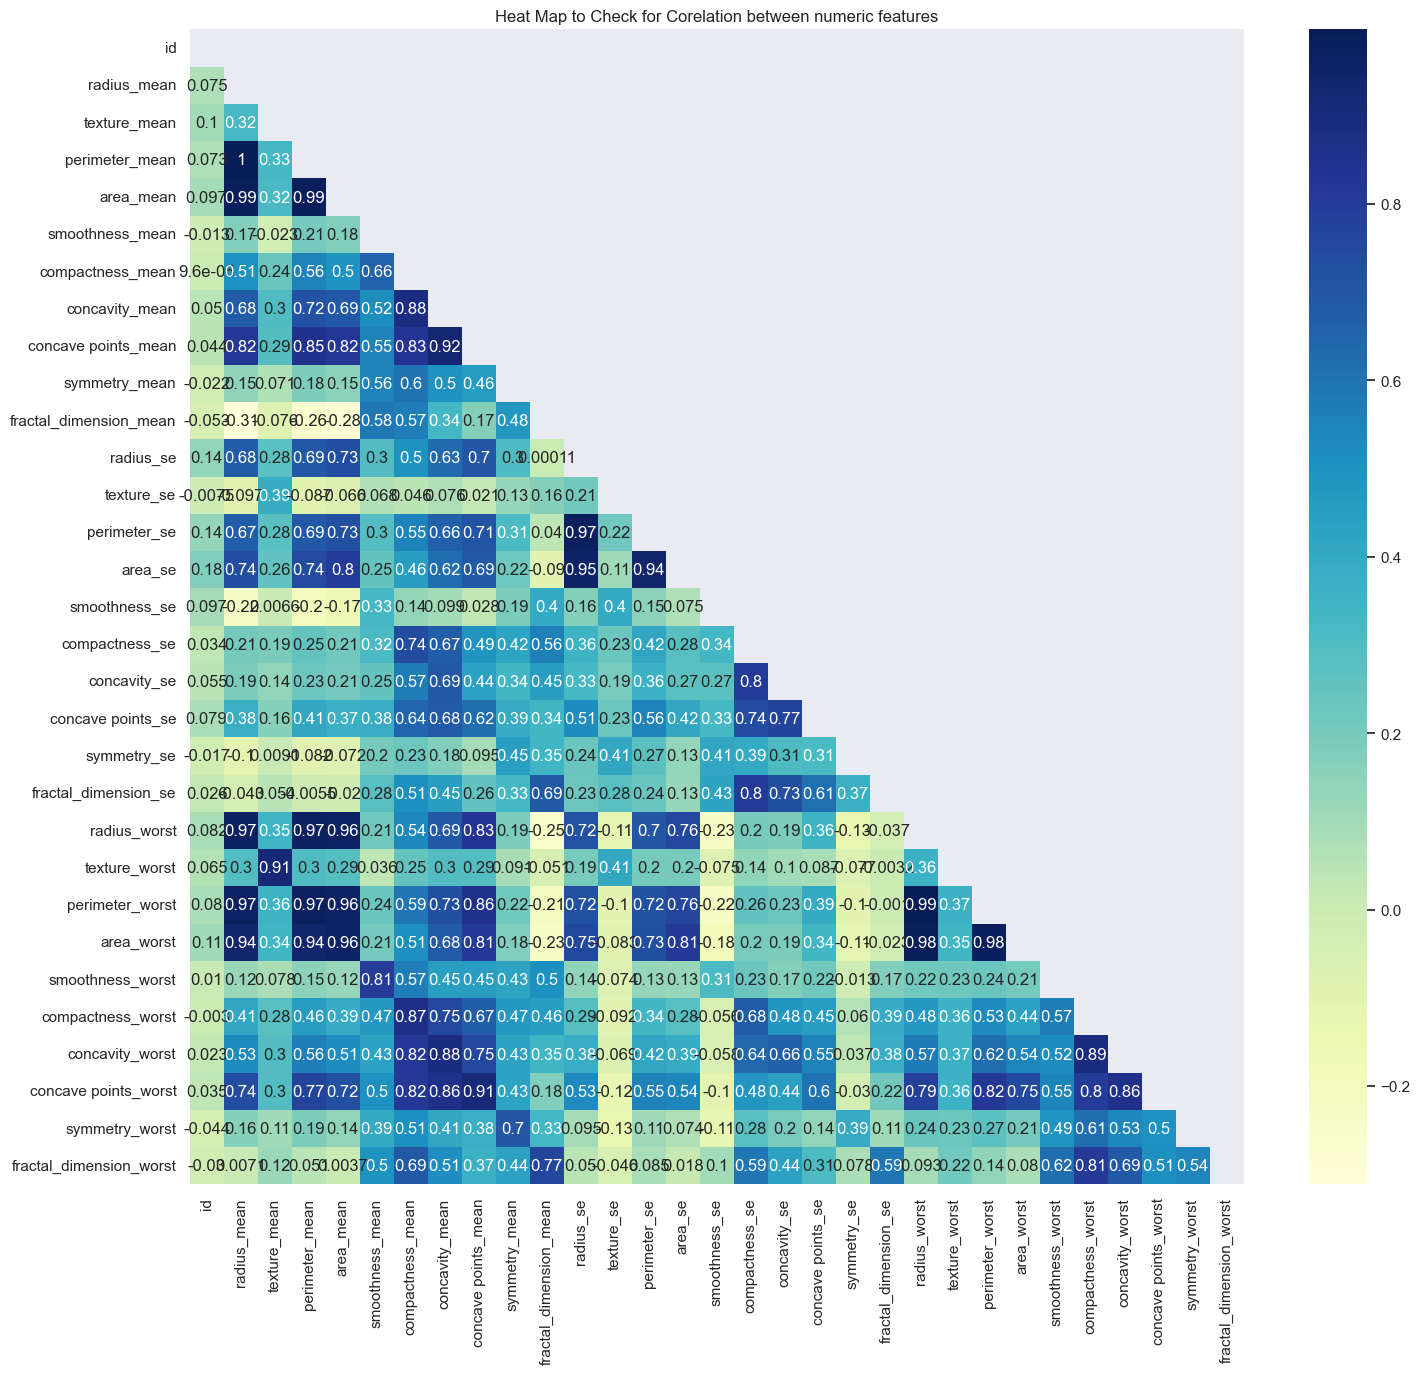

In [133]:
# Heat Map to Check for Corelation between numeric features
plt.figure(figsize=(17, 15)) # Augmenter figsize en cas de problème de visualisation
mask = np.triu(np.ones_like(corr_df.corr(method='pearson')))
sns.set(rc = {'figure.figsize':(26, 24)})
sns.heatmap(corr_df.corr(method='pearson'), cmap="YlGnBu", annot=True, mask=mask)
plt.title("Heat Map to Check for Corelation between numeric features");


In [60]:
# Moyenne de chaque variable explicative calculée dans classe
m = data.iloc[:,1:].groupby('diagnosis').mean()
m

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


### Relationship between categorical variables and target variable by using chi-square test

No categorical variables

### Visualization

In [79]:
# L'écart absolu des moyennes intra classe dans chaque variable explicative
ecart_moyenne = pd.DataFrame({'features':m.columns, 'ecart moyenne':abs(m.iloc[0,:] - m.iloc[1,:]).values})
ecart_moyenne.sort_values('ecart moyenne', ascending=False, inplace=True)
ecart_moyenne

,features,ecart moyenne
23,area_worst,863.386881
3,area_mean,515.586219
22,perimeter_worst,54.364392
13,area_se,51.537257
2,perimeter_mean,37.289971
20,radius_worst,7.755010
21,texture_worst,5.803138
0,radius_mean,5.316306
1,texture_mean,3.690144
12,perimeter_se,2.323608


Le calcul de l'écart absolu des moyennes intra classe sur chaque variable explicative mesure la différence de dispersion de celle ci sur les deux classes. 

First let's check the impact of feature area_worst on diagnosis

Text(0.5, 1.0, 'Impact of area_worst on diagnosis')

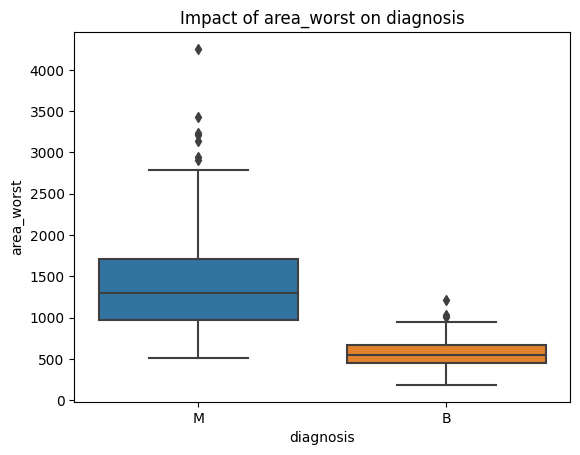

In [80]:
#fig, ax=plt.subplots(figsize=(8,6))
plt.figure()
sns.boxplot(x=data.diagnosis, y=data.area_worst)
plt.title('Impact of area_worst on diagnosis')


Text(0.5, 1.0, 'Impact of area_mean on diagnosis')

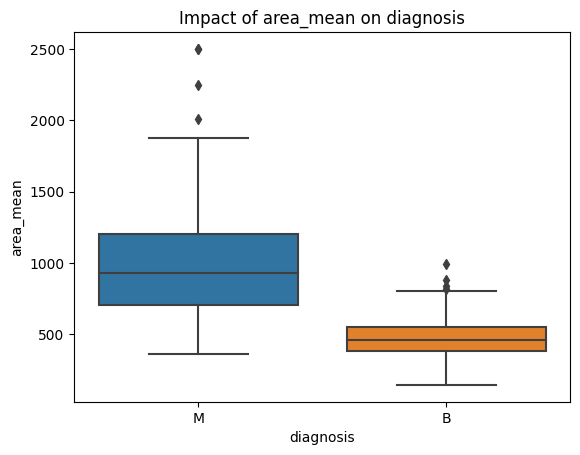

In [82]:
#fig, ax=plt.subplots(figsize=(8,6))
plt.figure()
sns.boxplot(x=data.diagnosis, y=data.area_mean)
plt.title('Impact of area_mean on diagnosis')

Text(0.5, 1.0, 'Impact of perimeter_worst on diagnosis')

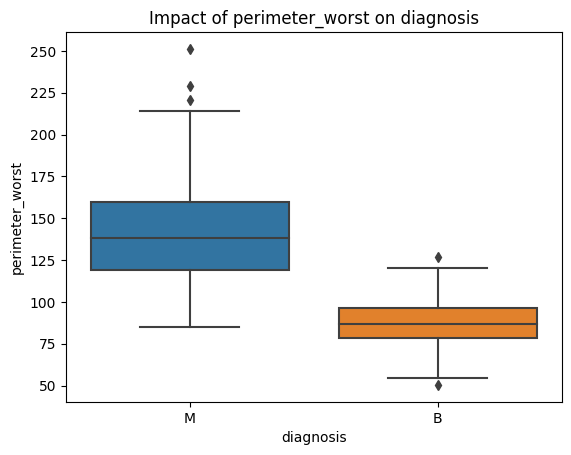

In [83]:
#fig, ax=plt.subplots(figsize=(8,6))
plt.figure()
sns.boxplot(x=data.diagnosis, y=data.perimeter_worst)
plt.title('Impact of perimeter_worst on diagnosis')

Text(0.5, 1.0, 'Impact of area_se on diagnosis')

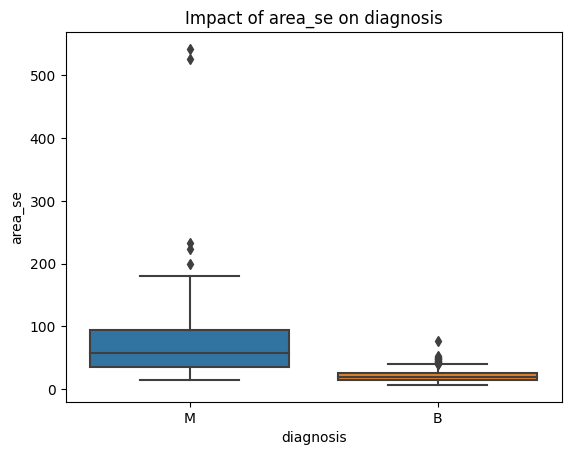

In [85]:
#fig, ax=plt.subplots(figsize=(8,6))
plt.figure()
sns.boxplot(x=data.diagnosis, y=data.area_se)
plt.title('Impact of area_se on diagnosis')

Text(0.5, 1.0, 'Impact of perimeter_mean on diagnosis')

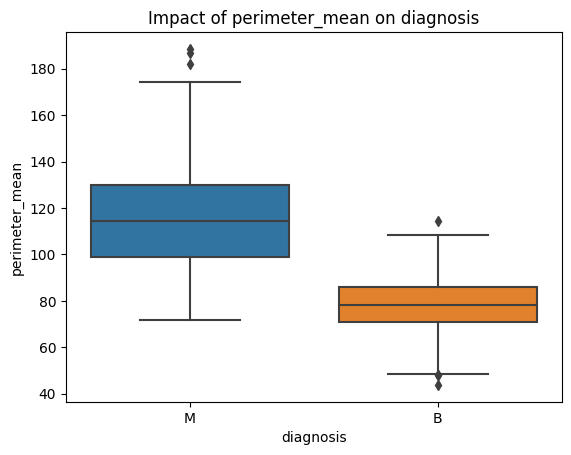

In [86]:
#fig, ax=plt.subplots(figsize=(8,6))
plt.figure()
sns.boxplot(x=data.diagnosis, y=data.perimeter_mean)
plt.title('Impact of perimeter_mean on diagnosis')

Text(0.5, 1.0, 'Impact of radius_worst on diagnosis')

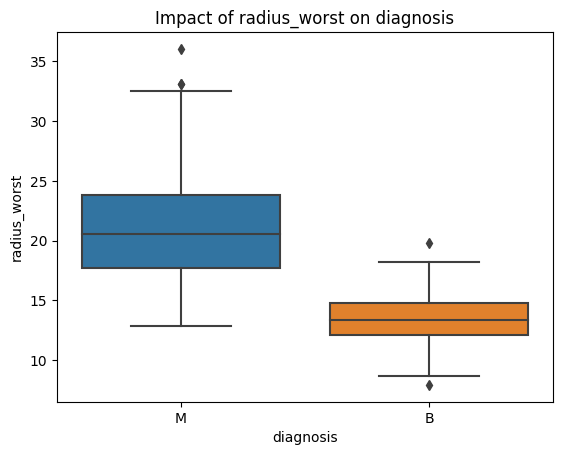

In [87]:
#fig, ax=plt.subplots(figsize=(8,6))
plt.figure()
sns.boxplot(x=data.diagnosis, y=data.radius_worst)
plt.title('Impact of radius_worst on diagnosis')

Text(0.5, 1.0, 'Impact of symmetry_se on diagnosis')

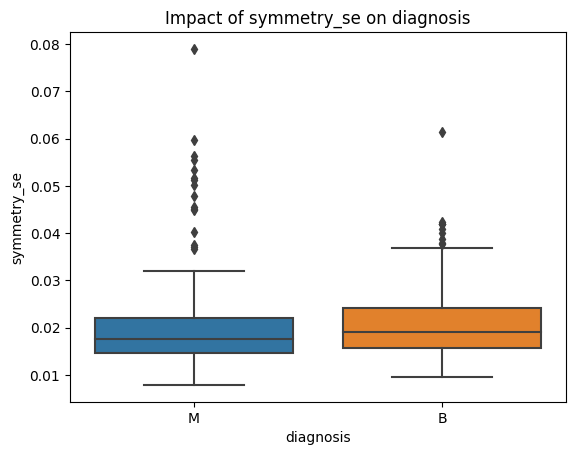

In [89]:
#fig, ax=plt.subplots(figsize=(8,6))
plt.figure()
sns.boxplot(x=data.diagnosis, y=data.symmetry_se)
plt.title('Impact of symmetry_se on diagnosis')

In [92]:
from scipy.stats import chi2_contingency
csq=chi2_contingency(pd.crosstab(data['diagnosis'], data['symmetry_se']))
print("P-value: ",csq[1])

P-value:  0.6083255561888706


In [ ]:
from scipy.stats import chi2_contingency
csq=chi2_contingency(pd.crosstab(data['diagnosis'], data['symmetry_se']))
print("P-value: ",csq[1])

In [93]:

from scipy.stats import chi2_contingency
csq=chi2_contingency(pd.crosstab(data['diagnosis'], data['area_mean']))
print("P-value: ",csq[1])

P-value:  0.3070888453840926
